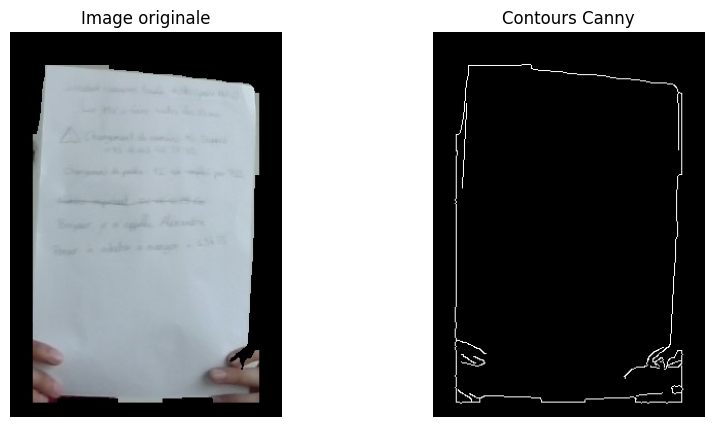

In [79]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("object_20251002-152901_0.jpg")

edges = cv2.Canny(img, threshold1=100, threshold2=200)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Image originale")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Contours Canny")
plt.imshow(edges, cmap='gray')  
plt.axis("off")

plt.show()



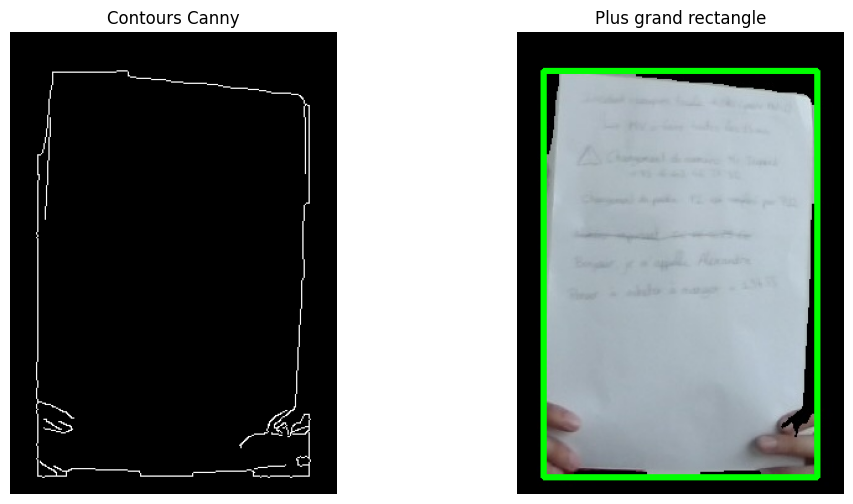

In [80]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



# Dimensions de sortie (même taille que l'image originale)
h, w = img.shape[:2]


# Trouver les contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Chercher le plus grand rectangle
max_area = 0
best_box = None

for cnt in contours:
    if len(cnt) < 5:
        continue
    
    rect = cv2.minAreaRect(cnt)
    (cx, cy), (rw, rh), angle = rect
    area = rw * rh
    
    if area > max_area:
        max_area = area
        best_box = cv2.boxPoints(rect)
        best_box = best_box.astype(int)
        
img_biggest = img.copy()
if best_box is not None:
    cv2.drawContours(img_biggest, [best_box], 0, (0, 255, 0), 3)


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Contours Canny")
plt.imshow(edges, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Plus grand rectangle")
plt.imshow(cv2.cvtColor(img_biggest, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()


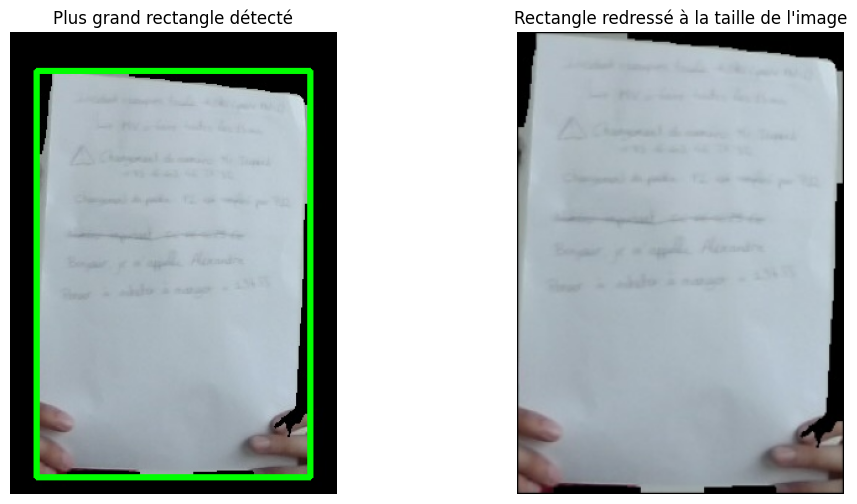

In [81]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



# Transformation de perspective pour adapter à la taille de l'image
if best_box is not None:
    # Ordre des points pour éviter les inversions
    best_box = best_box[np.argsort(best_box[:,1])]  # trier par y
    top = sorted(best_box[:2], key=lambda x: x[0])
    bottom = sorted(best_box[2:], key=lambda x: x[0])
    ordered_box = np.array([top[0], top[1], bottom[1], bottom[0]], dtype="float32")

    # Destination : rectangle de même taille que l'image
    dst_pts = np.array([[0,0],[w-1,0],[w-1,h-1],[0,h-1]], dtype="float32")

    # Calcul de la matrice de transformation
    M = cv2.getPerspectiveTransform(ordered_box, dst_pts)
    warped = cv2.warpPerspective(img, M, (w,h))

    # Sauvegarde en fichier
    cv2.imwrite("rectangle_redresse.jpg", warped)
    
    # Affichage
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.title("Plus grand rectangle détecté")
    temp = img.copy() 
    cv2.drawContours(temp, [best_box.astype(int)], -1, (0,255,0), 3)
    plt.imshow(cv2.cvtColor(temp, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title("Rectangle redressé à la taille de l'image")
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [82]:

def warpPerspective(image_path):

    img = cv2.imread(image_path)

    edges = cv2.Canny(img, threshold1=100, threshold2=200)

   
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    
    max_area = 0
    best_box = None

    for cnt in contours:
        if len(cnt) < 5:
            continue
        
        rect = cv2.minAreaRect(cnt)
        (cx, cy), (rw, rh), angle = rect
        area = rw * rh
        
        if area > max_area:
            max_area = area
            best_box = cv2.boxPoints(rect)
            best_box = best_box.astype(int)
            
    img_biggest = img.copy()
    if best_box is not None:
        cv2.drawContours(img_biggest, [best_box], 0, (0, 255, 0), 3)


    # Transformation de perspective pour adapter à la taille de l'image
    if best_box is not None:
        # Ordre des points pour éviter les inversions
        best_box = best_box[np.argsort(best_box[:,1])]  # trier par y
        top = sorted(best_box[:2], key=lambda x: x[0])
        bottom = sorted(best_box[2:], key=lambda x: x[0])
        ordered_box = np.array([top[0], top[1], bottom[1], bottom[0]], dtype="float32")

        # Destination : rectangle de même taille que l'image
        dst_pts = np.array([[0,0],[w-1,0],[w-1,h-1],[0,h-1]], dtype="float32")

        # Calcul de la matrice de transformation
        M = cv2.getPerspectiveTransform(ordered_box, dst_pts)
        warped = cv2.warpPerspective(img, M, (w,h))

        
        cv2.imwrite("rectangle_redresse.jpg", warped)


In [83]:
image_path = "object_20251002-152913_0.jpg"
warpPerspective(image_path)